<a href="https://colab.research.google.com/github/Mamatha22mh1a4249/DeepLearning-Lab/blob/main/experiment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from tensorflow.keras.layers import SimpleRNN,  LSTM,  GRU,  Bidirectional,  Dense,Embedding

from tensorflow.keras.datasets import imdb


from tensorflow.keras.models import Sequential

In [4]:
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(x_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
word_idx = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
word_idx = {i: word for word, i in word_idx.items()}

In [7]:
print([word_idx[i] for i in x_train[0]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [8]:
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))
from tensorflow.keras.preprocessing import sequence

Max length of a review::  2697
Min length of a review::  70


In [9]:
max_words = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)


x_valid, y_valid = x_train[:64], y_train[:64]



x_train_, y_train_ = x_train[64:], y_train[64:]

In [10]:
embd_len = 32

In [11]:
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
embd_len,
input_length=max_words))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
RNN_model.add(SimpleRNN(128,
activation='tanh',
return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

In [13]:
print(RNN_model.summary())

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
RNN_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

In [15]:
history = RNN_model.fit(x_train_, y_train_,


batch_size=64,
epochs=5,
verbose=1,
validation_data=(x_valid, y_valid))

Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 75s 185ms/step - accuracy: 0.5183 - loss: 0.6938 - val_accuracy: 0.4219 - val_loss: 0.6982
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 77s 174ms/step - accuracy: 0.6242 - loss: 0.6417 - val_accuracy: 0.6250 - val_loss: 0.6683
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.6748 - loss: 0.6052 - val_accuracy: 0.6250 - val_loss: 0.6604
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 83s 178ms/step - accuracy: 0.7661 - loss: 0.4854 - val_accuracy: 0.7656 - val_loss: 0.5467
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 81s 175ms/step - accuracy: 0.8184 - loss: 0.4231 - val_accuracy: 0.7656 - val_loss: 0.5670



Simple_RNN Score--->  [0.46874913573265076, 0.7880799770355225]


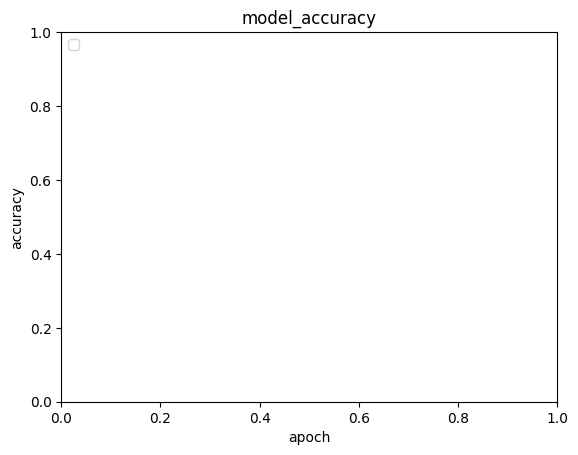

In [17]:
print()

print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))
plt.title('model_accuracy')
plt.ylabel('accuracy') # Corrected the typo from ylable to ylabel
plt.xlabel('apoch') # Corrected the typo from xlable to xlabel
plt.legend(['train','val'],loc='upper left')
plt.show()